# ADSB RF Signal Link Budget Analysis

This notebook is here to demonstrate how to compute a simple RF Signal Link Budget thanks to the [PyRFBudget project](https://github.com/loic-fejoz/pyrf-budget-toolbox). The example is clearly based on the one provided by [PySDR](https://pysdr.org/content/link_budgets.html)

So let's start by importing all of the library:

In [1]:
from rfbudget import *

First lets define few variables that clearly define the context of an ADSB communication, especially the frequency, the bandwidth, and the initial transmitter power.

In [2]:
adsb_freq = MHz(1090)
adsb_bandwidth = MHz(2)
transmit_power_dbm = watt_to_dBm(100)

Lets say that the antenna supported by the airplane is slightly directive because it is directed to the ground and provide a 3dB gain:

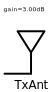

In [3]:
tx_antenna = Antenna(
    name='TxAnt',
    gain=dB(3),
)
d = into_schemdraw([tx_antenna], {'with_gain': True})

Assuming the airplane is at 30km from the ground, we need to compute the actual free space loss thanks to the Friis formula:

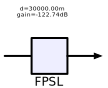

In [4]:
freespace = FreeSpacePathLossFriis(
    distance = km(30),
    freq = adsb_freq,
)
d = into_schemdraw([freespace], {'with_gain': True})

The receiving antenna on the ground is omni-directional so let's assume it has no gain.

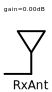

In [5]:
rx_antenna = Antenna(
    name='RxAnt',
    gain=dB(0),
)
d = into_schemdraw([rx_antenna], {'with_gain': True})

We need to take into account other loss, like for the rain, cables, and so on. Note that in future version, atmospheric, and rain attenuation will be computed.

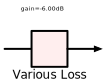

In [6]:
other_loss = Loss(name="Various Loss", loss=dB(6))
d = into_schemdraw([other_loss], {'with_gain': True})

And now we would like to know if we would be able to decode the ADSB signal. So let's compute the overall budget.

In [7]:
adbs_budget = budget(
    elements=[tx_antenna, freespace, rx_antenna, other_loss],
    input_freq=adsb_freq,
    available_input_power=transmit_power_dbm,
    signal_bandwidth=adsb_bandwidth,
    without_oip=True
)

The overall signal link is thus:

In [8]:
opt = {'with_gain': True, 'with_nf': True, 'simplified': True}
# d = adbs_budget.schemdraw(opt)

In [9]:
adbs_budget.display(with_icons=True, options=opt)